# FN
I am considering the following system

\begin{equation}
    \left\{\begin{aligned}
    &\dot{v} = v - \frac{v^3}{3} - w\\
    &\dot{w} = v - bw
    \end{aligned}\right.
\end{equation}

In [42]:
from functools import partial
from scipy.integrate import solve_ivp


import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler, colormaps

rcParams['axes.prop_cycle'] = cycler(color=plt.get_cmap('tab20').colors)
rcParams['text.usetex']=True
rcParams['font.family']='serif'

import numpy as np

In [70]:
class Res:
    def __init__(self, data: dict):
        for k, v in data.items():
            setattr(self, k, v)


def solve_bcm(F, t_span, y0, t_pres):
    
    dt = 1e-3
    n_steps = int(t_span[1]/dt)
    n_pres = int(t_pres/dt)

    u = np.zeros((2,n_steps))
    u[0,::n_pres] = 1
    u[1,n_pres::n_pres] = 1


    # euler 1 lets go
    res = Res({
        't' : np.linspace(*t_span, n_steps),
        'y' : np.empty((2,n_steps))
    })

    res.y[:,0] = y0

    for i in range(1, n_steps):
        res.y[:, i] = res.y[:,i-1] + F(res.y[i-1])*dt

    return dt


In [8]:
def full_RHS(t,x,**kwargs):
    v, w = x
    return (
        v - v**3/3 -w,
        1/kwargs['tau_w']*(v - kwargs['b']*w)
    )

def full_RHS(t,x,**kwargs):
    w1, w2 = x
    theta = w1**2 + w2**2
    return (
        w1 * (w1 - theta),
        w2 * (w2 - theta)
    )



In [66]:
def plotter(rng, ax, RHS, **kwargs):

    # Lower plot
    y0s = rng.uniform(-0.5,1.5,size=(10,2))

    colors = colormaps['viridis'](np.linspace(0,1,len(y0s)))
    rng.shuffle(colors)

    for c, y0  in zip(colors, y0s):
        res = solve_bcm(RHS, t_span=[0,20], y0=y0, t_pres=0.3)

        ax.plot(res.y[0], res.y[1], linewidth=0.5, c=c, alpha=0.3)

    ax.set_xticks([])
    ax.set_yticks([])

    for s in ax.spines.values(): s.set_visible(False)


    # if inset: ax.indicate_inset_zoom(axins, edgecolor='black')



TypeError: full_RHS() missing 1 required positional argument: 'x'

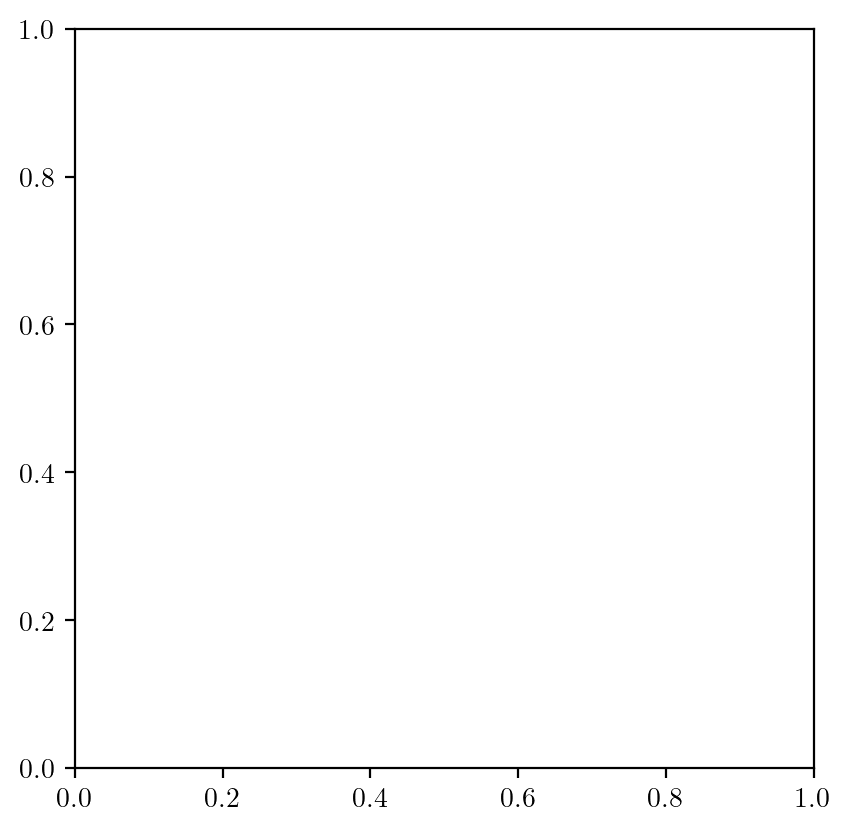

In [71]:
rng = np.random.default_rng(seed=2026)

RHS = partial(full_RHS, tau_w=1.1, b=1.)

ax = plt.figure(dpi=200).add_subplot()
ax.set_aspect('equal')
plotter(rng, ax, RHS)

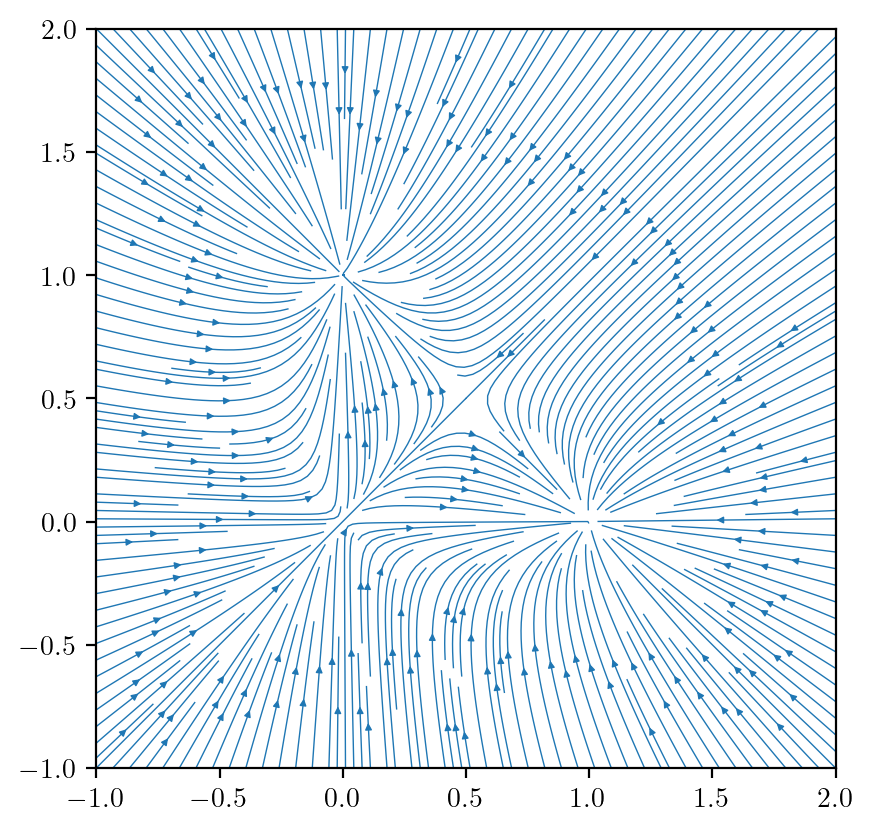

In [21]:
RHS = partial(full_RHS, tau_w=1.1, b=1.)

x = np.linspace(-1,2, 100)
y = x
xx, yy = np.meshgrid(x,y)

uu, vv = RHS(0, (xx,yy))

ax = plt.figure(dpi=200).add_subplot()
ax.set_aspect('equal')
ax.streamplot(xx,yy,uu,vv, linewidth=0.5, density=3, arrowsize=0.5)

